<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn as sks
import seaborn as sns
import plotly
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder ,StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
import scipy
from sklearn.metrics import f1_score , log_loss , jaccard_similarity_score
import warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-07-16 08:21:31--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.001s  

2020-07-16 08:21:31 (15.4 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [3]:
#loading the dataset
data = pd.read_csv('loan_train.csv')
print("Csv = \n", data.head())

Csv = 
    Unnamed: 0  Unnamed: 0.1 loan_status  Principal  terms effective_date  \
0           0             0     PAIDOFF       1000     30       9/8/2016   
1           2             2     PAIDOFF       1000     30       9/8/2016   
2           3             3     PAIDOFF       1000     15       9/8/2016   
3           4             4     PAIDOFF       1000     30       9/9/2016   
4           6             6     PAIDOFF       1000     30       9/9/2016   

    due_date  age             education  Gender  
0  10/7/2016   45  High School or Below    male  
1  10/7/2016   33              Bechalor  female  
2  9/22/2016   27               college    male  
3  10/8/2016   28               college  female  
4  10/8/2016   29               college    male  


In [4]:
data.shape
#checking null values
print("Null Values Sum \n= " , data.isnull().sum())

#dropping useless column  Unnamed: 0, index
data.drop([ 'Unnamed: 0' , 'Unnamed: 0.1'  ],axis =1 ,  inplace=True )
print("After Dropping Columns \n" , data.head(20))

#since no null values we can proceed with eda


Null Values Sum 
=  Unnamed: 0        0
Unnamed: 0.1      0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64
After Dropping Columns 
    loan_status  Principal  terms effective_date   due_date  age  \
0      PAIDOFF       1000     30       9/8/2016  10/7/2016   45   
1      PAIDOFF       1000     30       9/8/2016  10/7/2016   33   
2      PAIDOFF       1000     15       9/8/2016  9/22/2016   27   
3      PAIDOFF       1000     30       9/9/2016  10/8/2016   28   
4      PAIDOFF       1000     30       9/9/2016  10/8/2016   29   
5      PAIDOFF       1000     30       9/9/2016  10/8/2016   36   
6      PAIDOFF       1000     30       9/9/2016  10/8/2016   28   
7      PAIDOFF        800     15      9/10/2016  9/24/2016   26   
8      PAIDOFF        300      7      9/10/2016  9/16/2016   29   
9      PAIDOFF       1000     15      9/10/2016  10/9/2016   39   
10   

### Converting to datetime Format and adding a new column

In [5]:
#Data PreProcessing
print(data['due_date'].dtype)
print(data['effective_date'].dtype)
data['effective_date']=pd.to_datetime(data['effective_date'] , infer_datetime_format=True)
data['due_date']=pd.to_datetime(data['due_date'] , infer_datetime_format=True)

print(data['due_date'].dtype)
print(data['effective_date'].dtype)
print(data.head())

#Making  a new column due_days which the elapsed days from loan approval to due date
lst=[]
for row in data.itertuples():
 x = row.due_date - row.effective_date
 lst.append(x.days)

data['due_days'] = lst
print("New Column added = \n" , data['due_days'])

object
object
datetime64[ns]
datetime64[ns]
  loan_status  Principal  terms effective_date   due_date  age  \
0     PAIDOFF       1000     30     2016-09-08 2016-10-07   45   
1     PAIDOFF       1000     30     2016-09-08 2016-10-07   33   
2     PAIDOFF       1000     15     2016-09-08 2016-09-22   27   
3     PAIDOFF       1000     30     2016-09-09 2016-10-08   28   
4     PAIDOFF       1000     30     2016-09-09 2016-10-08   29   

              education  Gender  
0  High School or Below    male  
1              Bechalor  female  
2               college    male  
3               college  female  
4               college    male  
New Column added = 
 0      29
1      29
2      14
3      29
4      29
5      29
6      29
7      14
8       6
9      29
10     29
11      6
12      6
13     14
14     29
15     14
16     29
17     29
18     29
19     29
20     14
21     29
22     14
23     14
24     29
25     29
26     14
27     29
28     29
29     29
       ..
316    14
317    29
318 

# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

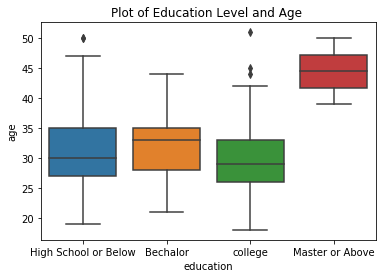

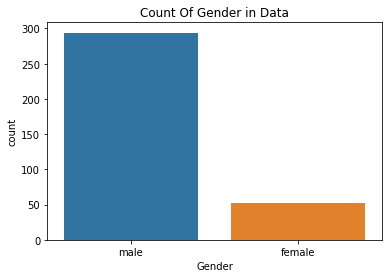

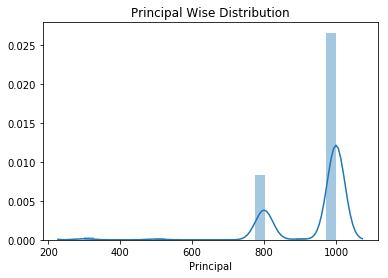

In [6]:
#EDA
sns.boxplot(x='education' , y='age' , data = data)
plt.title('Plot of Education Level and Age ')
plt.show()

sns.countplot(x='Gender' , data = data)
plt.title('Count Of Gender in Data')
plt.show()

sns.distplot(data['Principal'])
plt.title('Principal Wise Distribution')
plt.show()

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

# Pre-processing:  Feature selection/extraction

## Convert Categorical features to numerical values

## One Hot Encoding  


In [7]:
#converting categorical data to numerical type

#converting the target variable to numerical

print(data['loan_status'].unique())
data['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)
print("Target value replaced\n"  , data.head())

#doing the same to gender column
print(data['Gender'].unique())
data['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
print("Gender value replaced\n"  , data.head())

#doing one hot encoder for education column since it needs to be more expressive
# creating instance of one-hot-encoder
enc = OneHotEncoder()
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(data[['education']]).toarray())
# merge with main df bridge_df on key values
data = data.join(enc_df)
print(data.head(20))
print(data.columns)

['PAIDOFF' 'COLLECTION']
Target value replaced
    loan_status  Principal  terms effective_date   due_date  age  \
0            0       1000     30     2016-09-08 2016-10-07   45   
1            0       1000     30     2016-09-08 2016-10-07   33   
2            0       1000     15     2016-09-08 2016-09-22   27   
3            0       1000     30     2016-09-09 2016-10-08   28   
4            0       1000     30     2016-09-09 2016-10-08   29   

              education  Gender  due_days  
0  High School or Below    male        29  
1              Bechalor  female        29  
2               college    male        14  
3               college  female        29  
4               college    male        29  
['male' 'female']
Gender value replaced
    loan_status  Principal  terms effective_date   due_date  age  \
0            0       1000     30     2016-09-08 2016-10-07   45   
1            0       1000     30     2016-09-08 2016-10-07   33   
2            0       1000     15     2016-0

### Feature selection

Lets defind feature sets, X:

In [8]:
#defining X and Y
X = data.drop([  'loan_status' , 'effective_date' , 'due_date' , 'education' ],axis =1 )
Y= data['loan_status']
print('X = \n' , X)
print("Y= \n" , Y)



X = 
      Principal  terms  age  Gender  due_days    0    1    2    3
0         1000     30   45       0        29  0.0  1.0  0.0  0.0
1         1000     30   33       1        29  1.0  0.0  0.0  0.0
2         1000     15   27       0        14  0.0  0.0  0.0  1.0
3         1000     30   28       1        29  0.0  0.0  0.0  1.0
4         1000     30   29       0        29  0.0  0.0  0.0  1.0
5         1000     30   36       0        29  0.0  0.0  0.0  1.0
6         1000     30   28       0        29  0.0  0.0  0.0  1.0
7          800     15   26       0        14  0.0  0.0  0.0  1.0
8          300      7   29       0         6  0.0  0.0  0.0  1.0
9         1000     15   39       0        29  0.0  1.0  0.0  0.0
10        1000     30   26       0        29  0.0  0.0  0.0  1.0
11         900      7   26       1         6  0.0  0.0  0.0  1.0
12        1000      7   27       0         6  0.0  1.0  0.0  0.0
13         800     15   26       0        14  0.0  0.0  0.0  1.0
14        1000     

## Normalize Data 

Data Standardization give data zero mean and unit variance

In [9]:
#Scaling the Input Data Since it has multiple Units
Scaler = MinMaxScaler()
X = Scaler.fit_transform(X)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5, shuffle=True)

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [10]:
#KNN Model
#now we use a KNN model for the same

#Now to find the best model we use GridSearchCV

grid_params = {
    'n_neighbors'  : [2,3,4,5,6,7,8,9,10] ,
     'weights' : ['uniform' ,'distance'] ,
}

grid = GridSearchCV ( estimator=KNeighborsClassifier() , param_grid=grid_params,verbose =1 ,scoring='roc_auc')
grid_results = grid.fit(X_train,Y_train)

knn_pred =grid.predict(X_test)
#Score of Knn Model
print()
print()
print("F1 Sore of the KNN Classification model = " , f1_score(Y_test , knn_pred , average='weighted' ,labels=np.unique(knn_pred)))
print("Jacard Score of the KNN Classification model =  " ,  jaccard_similarity_score(Y_test , knn_pred ))
print("The Best K Value Has been Found as " , grid.best_estimator_)
print()

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.




F1 Sore of the KNN Classification model =  0.6019665683382499
Jacard Score of the KNN Classification model =   0.6714285714285714
The Best K Value Has been Found as  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')



[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    0.4s finished


# Decision Tree

In [11]:
#Descion Tree

# We will again use GridSearchCV to find the best model

params = { 'max_leaf_nodes': list(range(2, 20)), 'min_samples_split': [2, 3, 4] ,
           'max_depth'  :  [2,4,6,8]}

grid_2 =GridSearchCV(estimator=DecisionTreeClassifier(min_samples_leaf=1), param_grid=params ,verbose=1 ,scoring='roc_auc')

grid_2.fit(X_train, Y_train)

tree_pred = grid_2.predict(X_test)

#Score of Descion Tree Model
print()
print()
print("F1 Sore of the Descion Tree model = " , f1_score(Y_test , tree_pred , average='weighted' ,labels=np.unique(tree_pred)))
print("Jacard Score of the Descion Tree model =  " ,  jaccard_similarity_score(Y_test , tree_pred))
print()
print()

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.




F1 Sore of the Descion Tree model =  0.5694915254237288
Jacard Score of the Descion Tree model =   0.6857142857142857




[Parallel(n_jobs=1)]: Done 648 out of 648 | elapsed:    2.7s finished


# Support Vector Machine

In [26]:
#SVM Model
from sklearn import svm
svm = svm.SVC(probability=True)

pram_svm = { 'C': [1,0.01,0.001 , 0.0001,0.00001 ,0.000001],
            'kernel' : ['rbf' , 'poly' ]}
grid_3=GridSearchCV(estimator=svm , param_grid=pram_svm ,  verbose = 1 ,scoring='roc_auc')
grid_3.fit(X_train , Y_train)
svm_pred=grid_3.predict(X_test)
#Score of Support Vector Classifier Model
print()
print()
print("F1 Sore of the SVM model = " , f1_score(Y_test , svm_pred , average='weighted', labels=np.unique(svm_pred)))
print("Jacard Score of the SVM model =  " ,  jaccard_similarity_score(Y_test , svm_pred))
print()
print()


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning:

You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of 

Fitting 3 folds for each of 12 candidates, totalling 36 fits


F1 Sore of the SVM model =  0.8235294117647058
Jacard Score of the SVM model =   0.7




/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in vers

# Logistic Regression

In [27]:
#Logistic Regression
logi = LogisticRegression(max_iter=200 , class_weight='balanced' ,solver='lbfgs')
logi.fit(X_train , Y_train)

param_logi = { 'C' :[100,10,1,0.01,0.001 , 0.0001,0.00001 ,0.000001 ],
               'solver' : ['lbfgs'  ,'liblinear' ]}

#Using GridSearchCV to find the best HyperParameter
grid_1=GridSearchCV(estimator=logi , param_grid=param_logi  ,verbose=1 , scoring='roc_auc' )
grid_1.fit(X_train , Y_train)
logi_pred=grid_1.predict(X_test)
log_prob1 = grid_1.predict_proba(X_test)
#Score of Logistic Model
print()
print()
print("F1 Sore of the Logistic Regression model = " , f1_score(Y_test , logi_pred , average='weighted' , labels=np.unique(logi_pred)))
print("Log Loss Score of the Logistic Regression model =  " ,log_loss(Y_test , log_prob1 ))
print("Jacard Score of the Logistic Regression model =  " ,  jaccard_similarity_score(Y_test , logi_pred))
print()
print()

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning:

You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 16 candidates, totalling 48 fits


F1 Sore of the Logistic Regression model =  0.5195647625026155
Log Loss Score of the Logistic Regression model =   0.6916553420035864
Jacard Score of the Logistic Regression model =   0.5




[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



# Model Evaluation using Test set

First, download and load the test set:

In [28]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-07-16 08:25:30--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-07-16 08:25:30 (413 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [29]:
data_2 = pd.read_csv('loan_test.csv')
data_2.drop( 'Unnamed: 0' , axis =1 , inplace=True )
data_2.reset_index()
data_2.drop( 'Unnamed: 0.1' , axis =1 , inplace=True )

In [30]:
#Applying the necessary transfomation

data_2['effective_date']=pd.to_datetime(data_2['effective_date'] , infer_datetime_format=True)
data_2['due_date']=pd.to_datetime(data_2['due_date'] , infer_datetime_format=True)
lst=[]
for row in data_2.itertuples():
 x = row.due_date - row.effective_date
 lst.append(x.days)
data_2['due_days'] = lst
data_2['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)
data_2['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
enc = OneHotEncoder()
enc_df = pd.DataFrame(enc.fit_transform(data_2[['education']]).toarray())
data_2 = data_2.join(enc_df)
X = data_2.drop([ 'loan_status' , 'effective_date' , 'due_date' , 'education' ],axis =1 )
Y= data_2['loan_status']
Scaler = StandardScaler()
X = Scaler.fit_transform(X)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



In [32]:
#Score of Logistic Regression Model

#To Filter Warnings in python 
import warnings
warnings.filterwarnings('always')

logi_pred=grid_1.predict(X)
log_prob1 = grid_1.predict_proba(X)

n_lst=[]
j_lst=[]
f_lst=[]
l_lst=[]

print()
print()
print("F1 Sore of the Logistic Regression model = " ,f1_score(Y , logi_pred , average='weighted',labels=np.unique(logi_pred)))
print("Log Loss Score of the Logistic Regression model =  " ,log_loss(Y , log_prob1 ))
print("Jacard Score of the Logistic Regression model =  " ,  jaccard_similarity_score(Y , logi_pred   ))
print()
print()
f_lst.append(f1_score(Y , logi_pred , average='weighted', labels=np.unique(logi_pred)))
l_lst.append(log_loss(Y , log_prob1 ))
j_lst.append(jaccard_similarity_score(Y , logi_pred   ))
n_lst.append('LogisticRegression')

#Score of KNN Model
knn_pred =grid.predict(X)
knn_prob1 = grid.predict_proba(X)

print()
print()
print("F1 Sore of the KNN Classification model = " , f1_score(Y , knn_pred , average='weighted', labels=np.unique(knn_pred)))
print("Jacard Score of the KNN Classification model =  " ,  jaccard_similarity_score(Y , knn_pred ))
print("The Best K Value Has been Found as " , grid.best_estimator_)
print()
print()
f_lst.append(f1_score(Y , knn_pred , average='weighted'  , labels=np.unique(knn_pred)))

j_lst.append(jaccard_similarity_score(Y , knn_pred   ))
l_lst.append(log_loss(Y , knn_prob1 ))
n_lst.append('KNN')


#Score of Descion Tree Model
tree_pred = grid_2.predict(X)
tree_pred1 = grid_2.predict_proba(X)
print()
print()
print("F1 Sore of Descion Tree model = " , f1_score(Y , tree_pred , average='weighted' , labels=np.unique(tree_pred)))
print("Jacard Score of Descion Tree model =  " ,  jaccard_similarity_score(Y , tree_pred  ))
print()
print()
f_lst.append(f1_score(Y , tree_pred , average='weighted' , labels=np.unique(tree_pred)))
j_lst.append(jaccard_similarity_score(Y , tree_pred  ))
l_lst.append(log_loss(Y , tree_pred1 ))
n_lst.append('Descion Tree')

#Score of Support Vector Classifier Model
svm_pred=grid_3.predict(X)
svm_pred1 = grid_3.predict_proba(X)
print()
print()
print("F1 Sore of the SVM model = " , f1_score(Y , svm_pred , average='weighted' , labels=np.unique(svm_pred)))
print("Jacard Score of the SVM model =  " ,  jaccard_similarity_score(Y , svm_pred))
print()
print()
f_lst.append(f1_score(Y , svm_pred , average='weighted' , labels=np.unique(svm_pred)))
j_lst.append(jaccard_similarity_score(Y , svm_pred ))
l_lst.append(log_loss(Y , svm_pred1 ))
n_lst.append('SVM')



F1 Sore of the Logistic Regression model =  0.6630751964085297
Log Loss Score of the Logistic Regression model =   0.6764895888415248
Jacard Score of the Logistic Regression model =   0.6481481481481481




F1 Sore of the KNN Classification model =  0.6959228135698723
Jacard Score of the KNN Classification model =   0.7592592592592593
The Best K Value Has been Found as  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')




F1 Sore of Descion Tree model =  0.5566778900112234
Jacard Score of Descion Tree model =   0.5370370370370371




F1 Sore of the SVM model =  0.851063829787234
Jacard Score of the SVM model =   0.7407407407407407




# Report
Accuracy of the built model using different evaluation metrics:

In [33]:
# Final Report 
Report=pd.DataFrame(columns=['Algorithm' ,'Jaccard','F1-Score','LogLoss'])
Report['Algorithm'] = n_lst
Report['Jaccard'] = j_lst
Report['F1-Score'] = f_lst
Report['LogLoss'] = l_lst
print("Report\n"  , Report)

Report
             Algorithm   Jaccard  F1-Score   LogLoss
0  LogisticRegression  0.648148  0.663075  0.676490
1                 KNN  0.759259  0.695923  1.143064
2        Descion Tree  0.537037  0.556678  9.968117
3                 SVM  0.740741  0.851064  0.583934
